In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv("heart_v2.csv")
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [4]:
df["heart disease"].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

## train-test split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop(columns = ["heart disease"])
y = df["heart disease"]

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state = 42)
X_train.shape,X_test.shape

((189, 4), (81, 4))

## Building the decision tree

In [8]:
##using all the default parameters except depth
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt = DecisionTreeClassifier(max_depth=3)

In [10]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [11]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

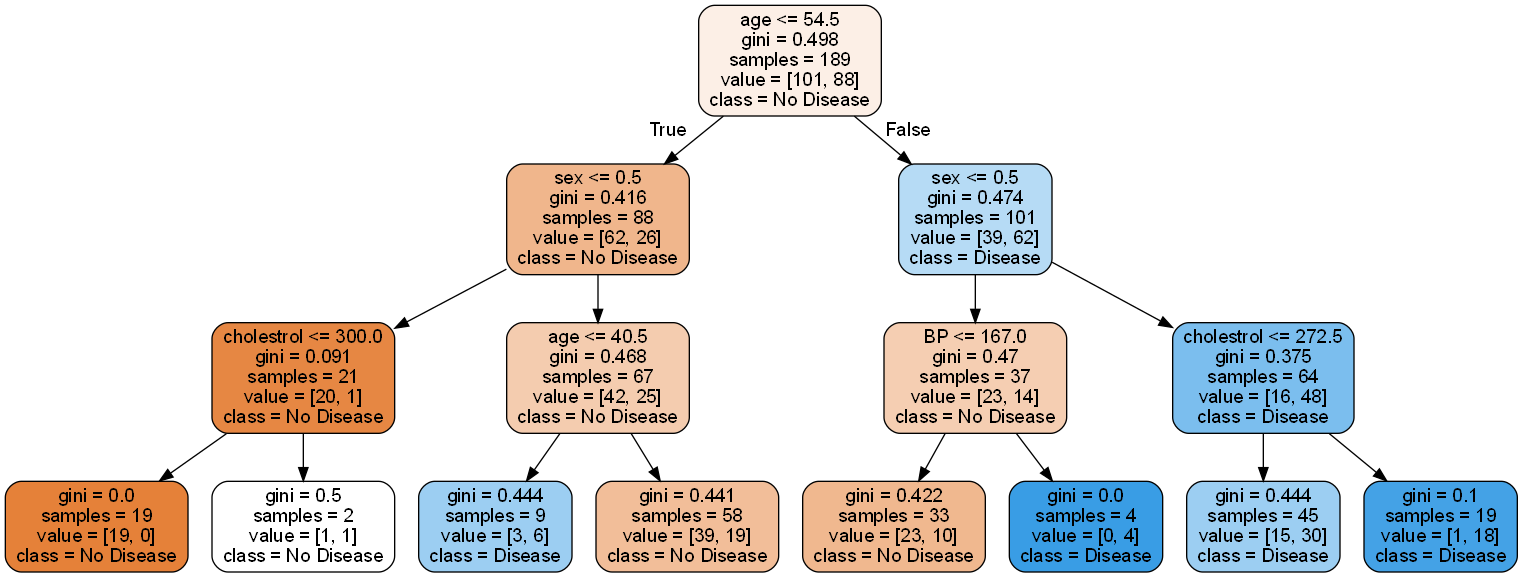

<Figure size 1152x720 with 0 Axes>

In [13]:
dot_data = StringIO()  
plt.figure(figsize = (16,10))
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [19]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
y_train_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score,auc,confusion_matrix

In [22]:
accuracy_score(y_train,y_train_pred)

0.7407407407407407

In [23]:
confusion_matrix(y_train,y_train_pred)

array([[82, 19],
       [30, 58]], dtype=int64)

In [24]:
accuracy_score(y_test,y_test_pred)

0.6049382716049383

In [25]:
confusion_matrix(y_test,y_test_pred)

array([[35, 14],
       [18, 14]], dtype=int64)

We see a great dip from train to test accuracy, lets tune some hyperparameters for this!

In [27]:
## lets create helper functions to create the graph
def get_dt_graph(dt_classifier):
    dot_data = StringIO()  
    plt.figure(figsize = (16,10))
    export_graphviz(dt_classifier, out_file=dot_data, filled=True, rounded=True,
                    feature_names=X.columns, 
                    class_names=['No Disease', "Disease"])

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [28]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [29]:
evaluate_model(dt)

Train Accuracy : 0.7407407407407407
Train Confusion Matrix:
[[82 19]
 [30 58]]
--------------------------------------------------
Test Accuracy : 0.6049382716049383
Test Confusion Matrix:
[[35 14]
 [18 14]]


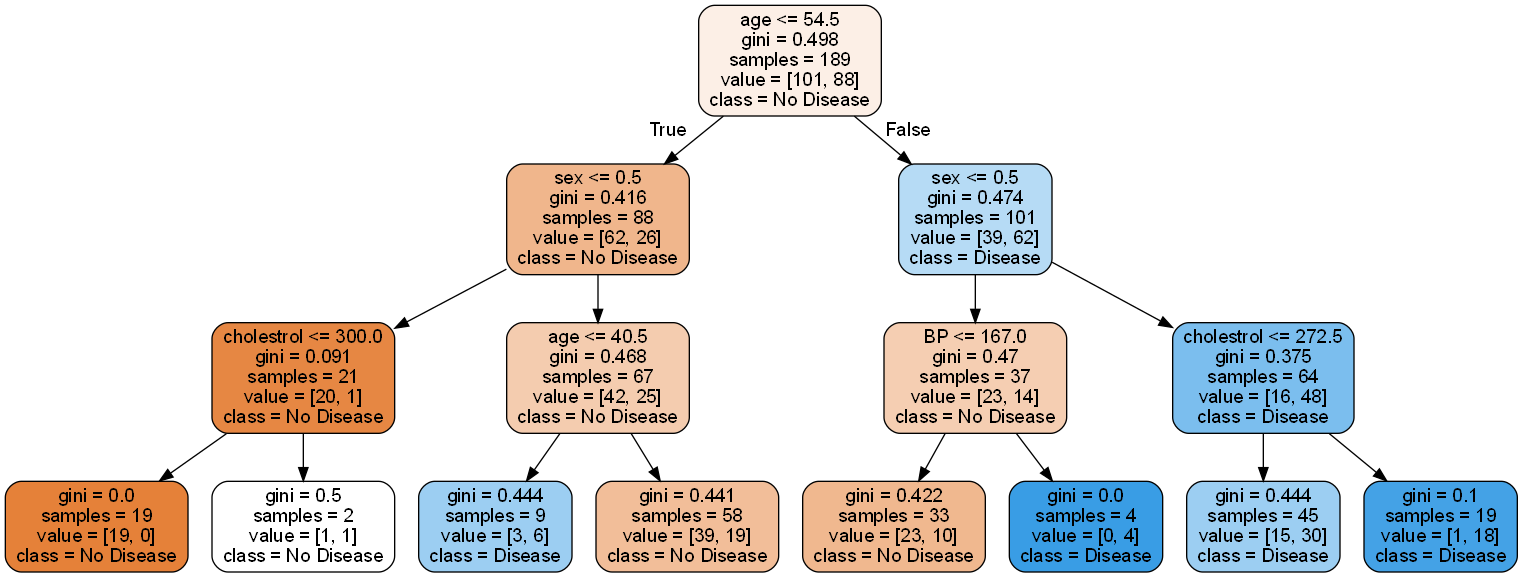

<Figure size 1152x720 with 0 Axes>

In [30]:
gph = get_dt_graph(dt)
Image(gph.create_png())

## Decision tree without hyper-parameter tuning

In [31]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

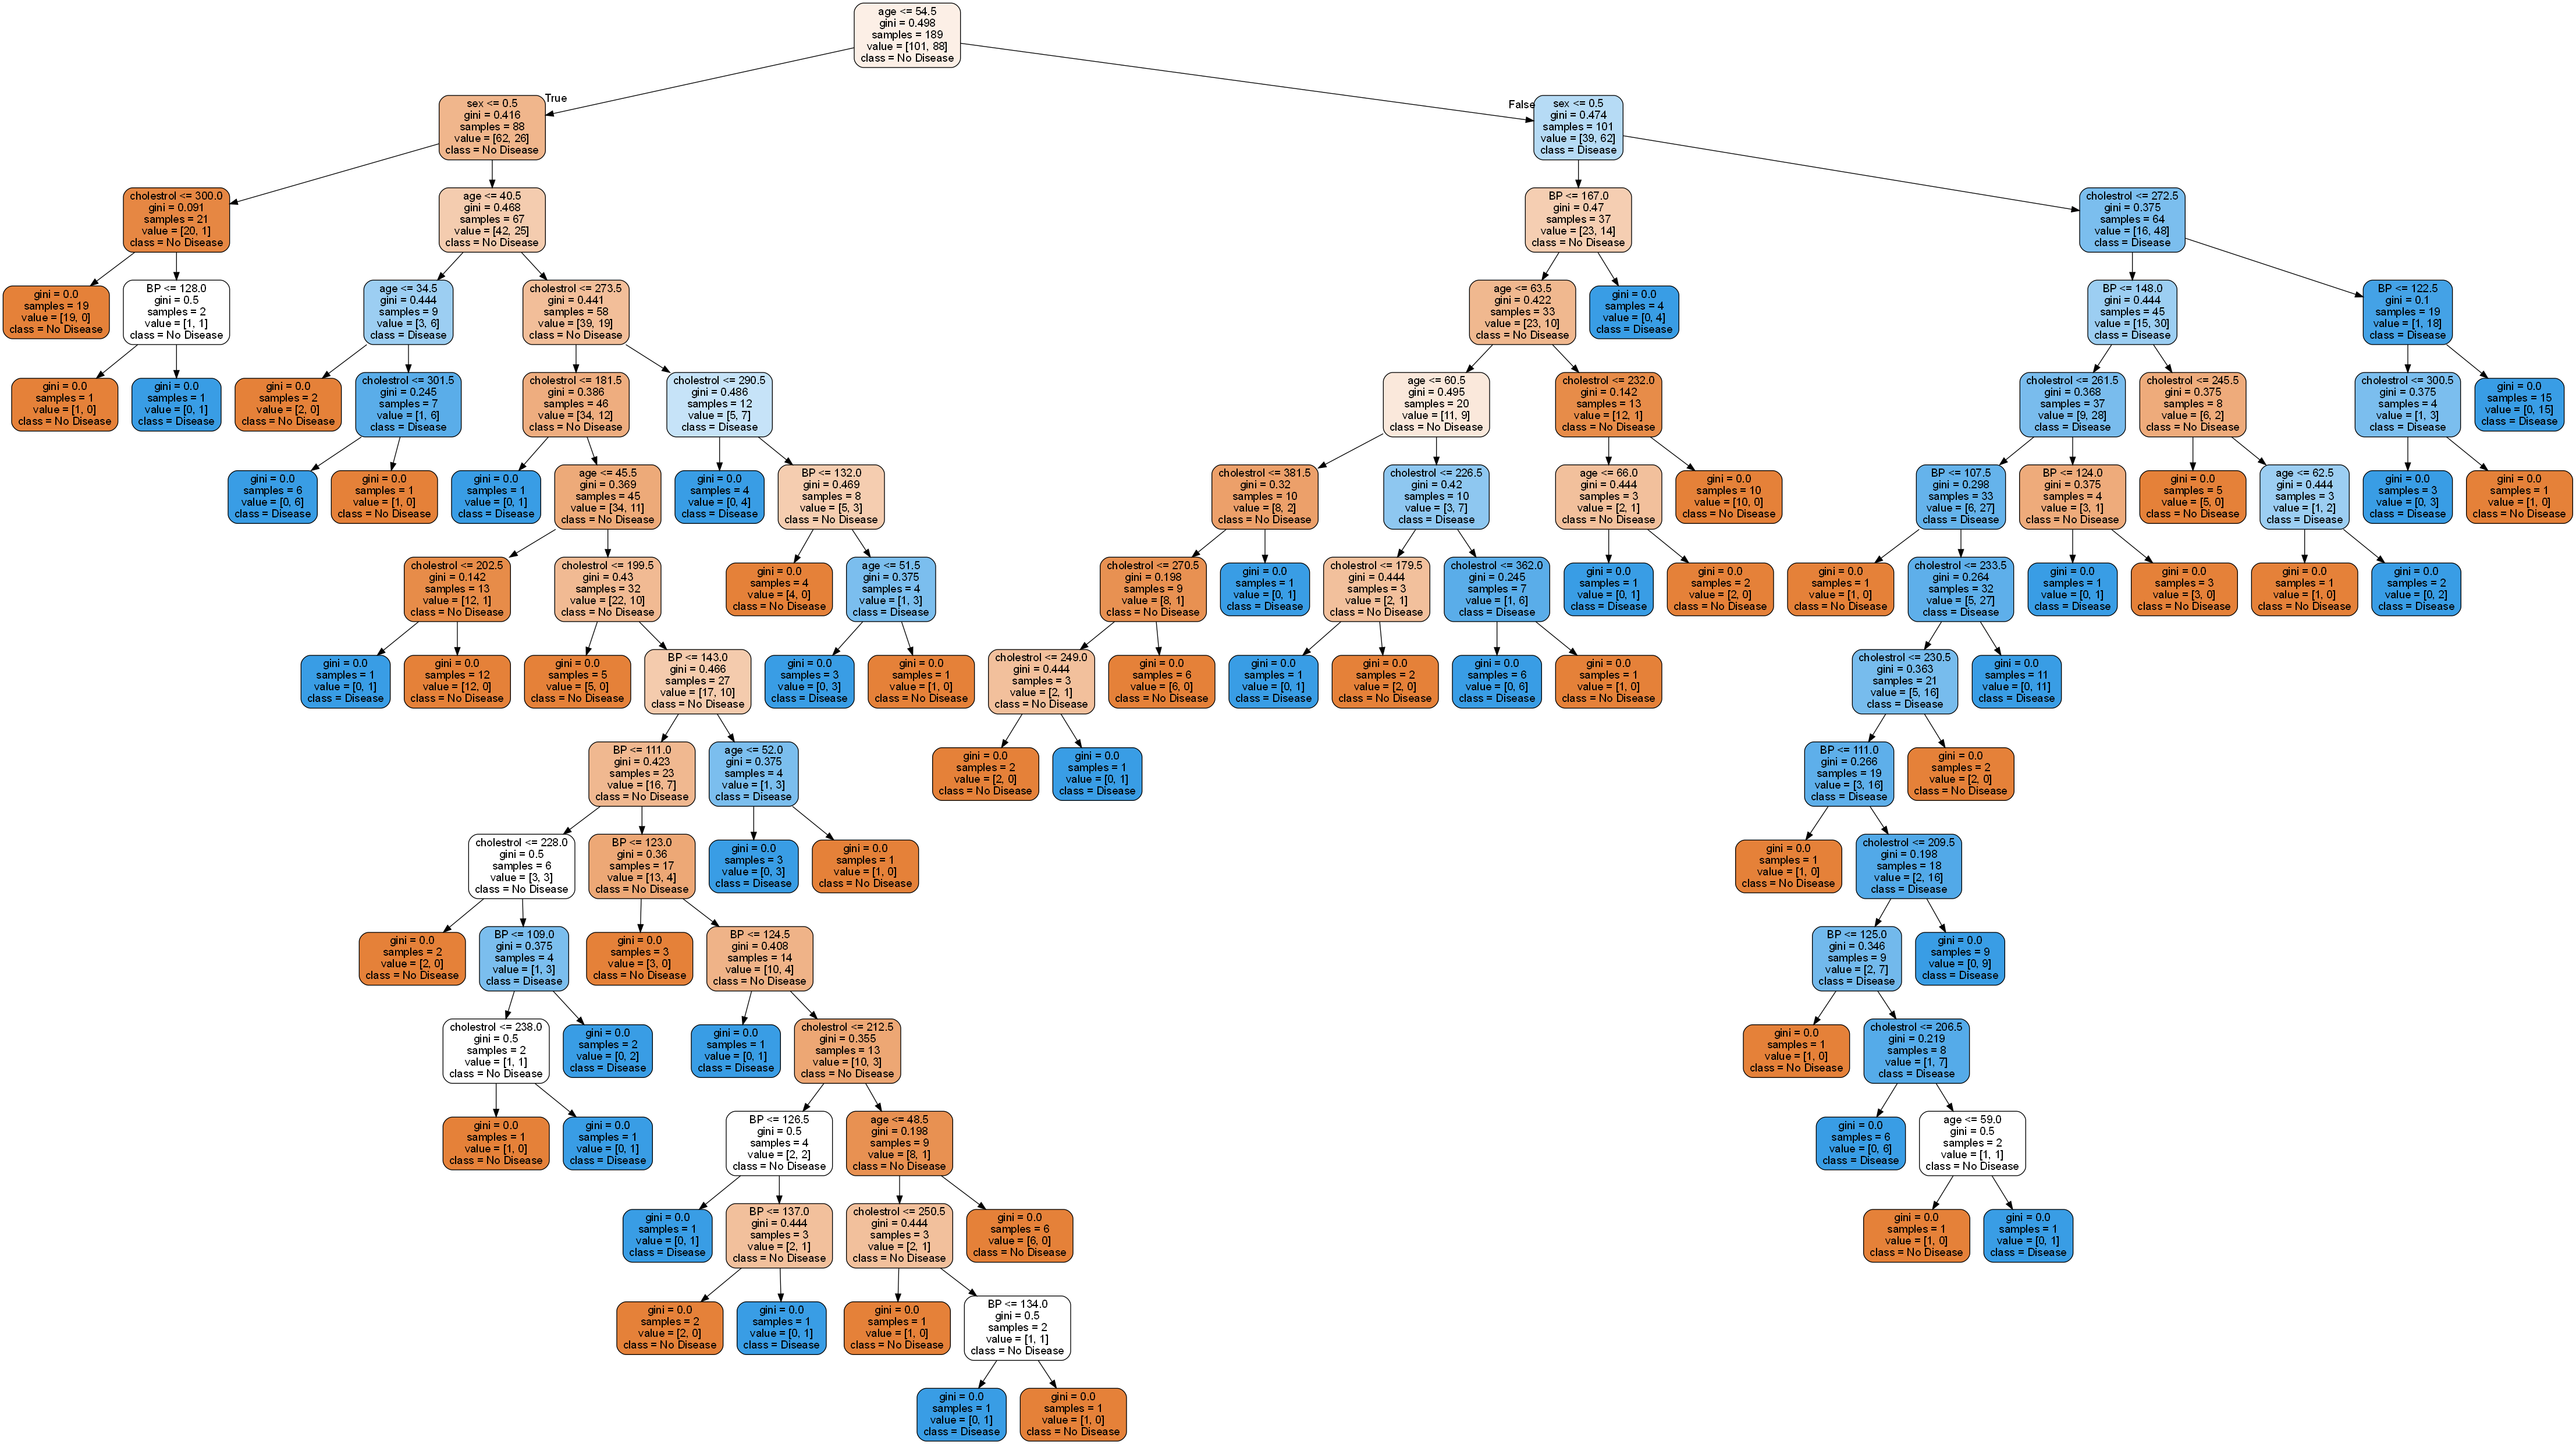

<Figure size 1152x720 with 0 Axes>

In [32]:
gph = get_dt_graph(dt_default)
Image(gph.create_png())

In [34]:
dt_default.get_depth()

15

In [35]:
evaluate_model(dt_default)

Train Accuracy : 1.0
Train Confusion Matrix:
[[101   0]
 [  0  88]]
--------------------------------------------------
Test Accuracy : 0.6296296296296297
Test Confusion Matrix:
[[31 18]
 [12 20]]


Accuracy on train set is 100%, test set is 63% which is overfitting clearly. 

Controlling the depth of the tree

In [36]:
dt_depth = DecisionTreeClassifier(max_depth=3,random_state=42)
dt_depth.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

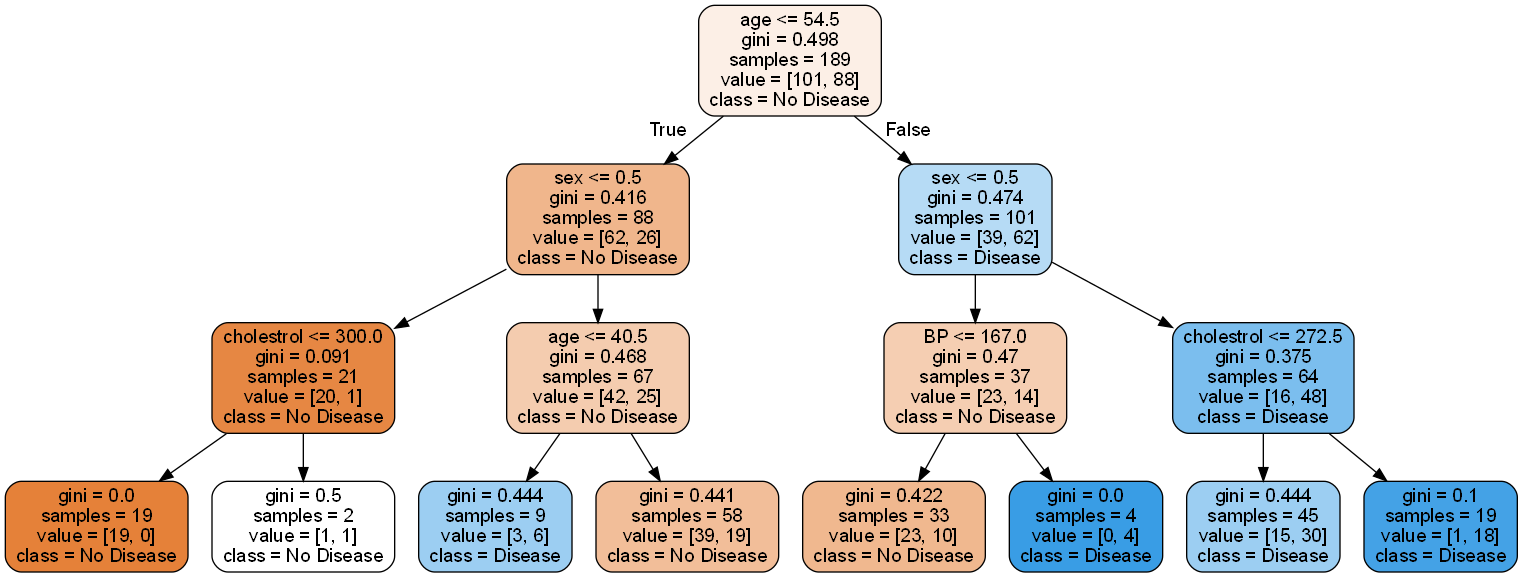

<Figure size 1152x720 with 0 Axes>

In [37]:
gph = get_dt_graph(dt_depth)
Image(gph.create_png())

In [38]:
evaluate_model(dt_depth)

Train Accuracy : 0.7407407407407407
Train Confusion Matrix:
[[82 19]
 [30 58]]
--------------------------------------------------
Test Accuracy : 0.6049382716049383
Test Confusion Matrix:
[[35 14]
 [18 14]]


specifying min samples before split, if node has less than this limit, it should not split

In [40]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20,random_state=42)
dt_min_split.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=42)

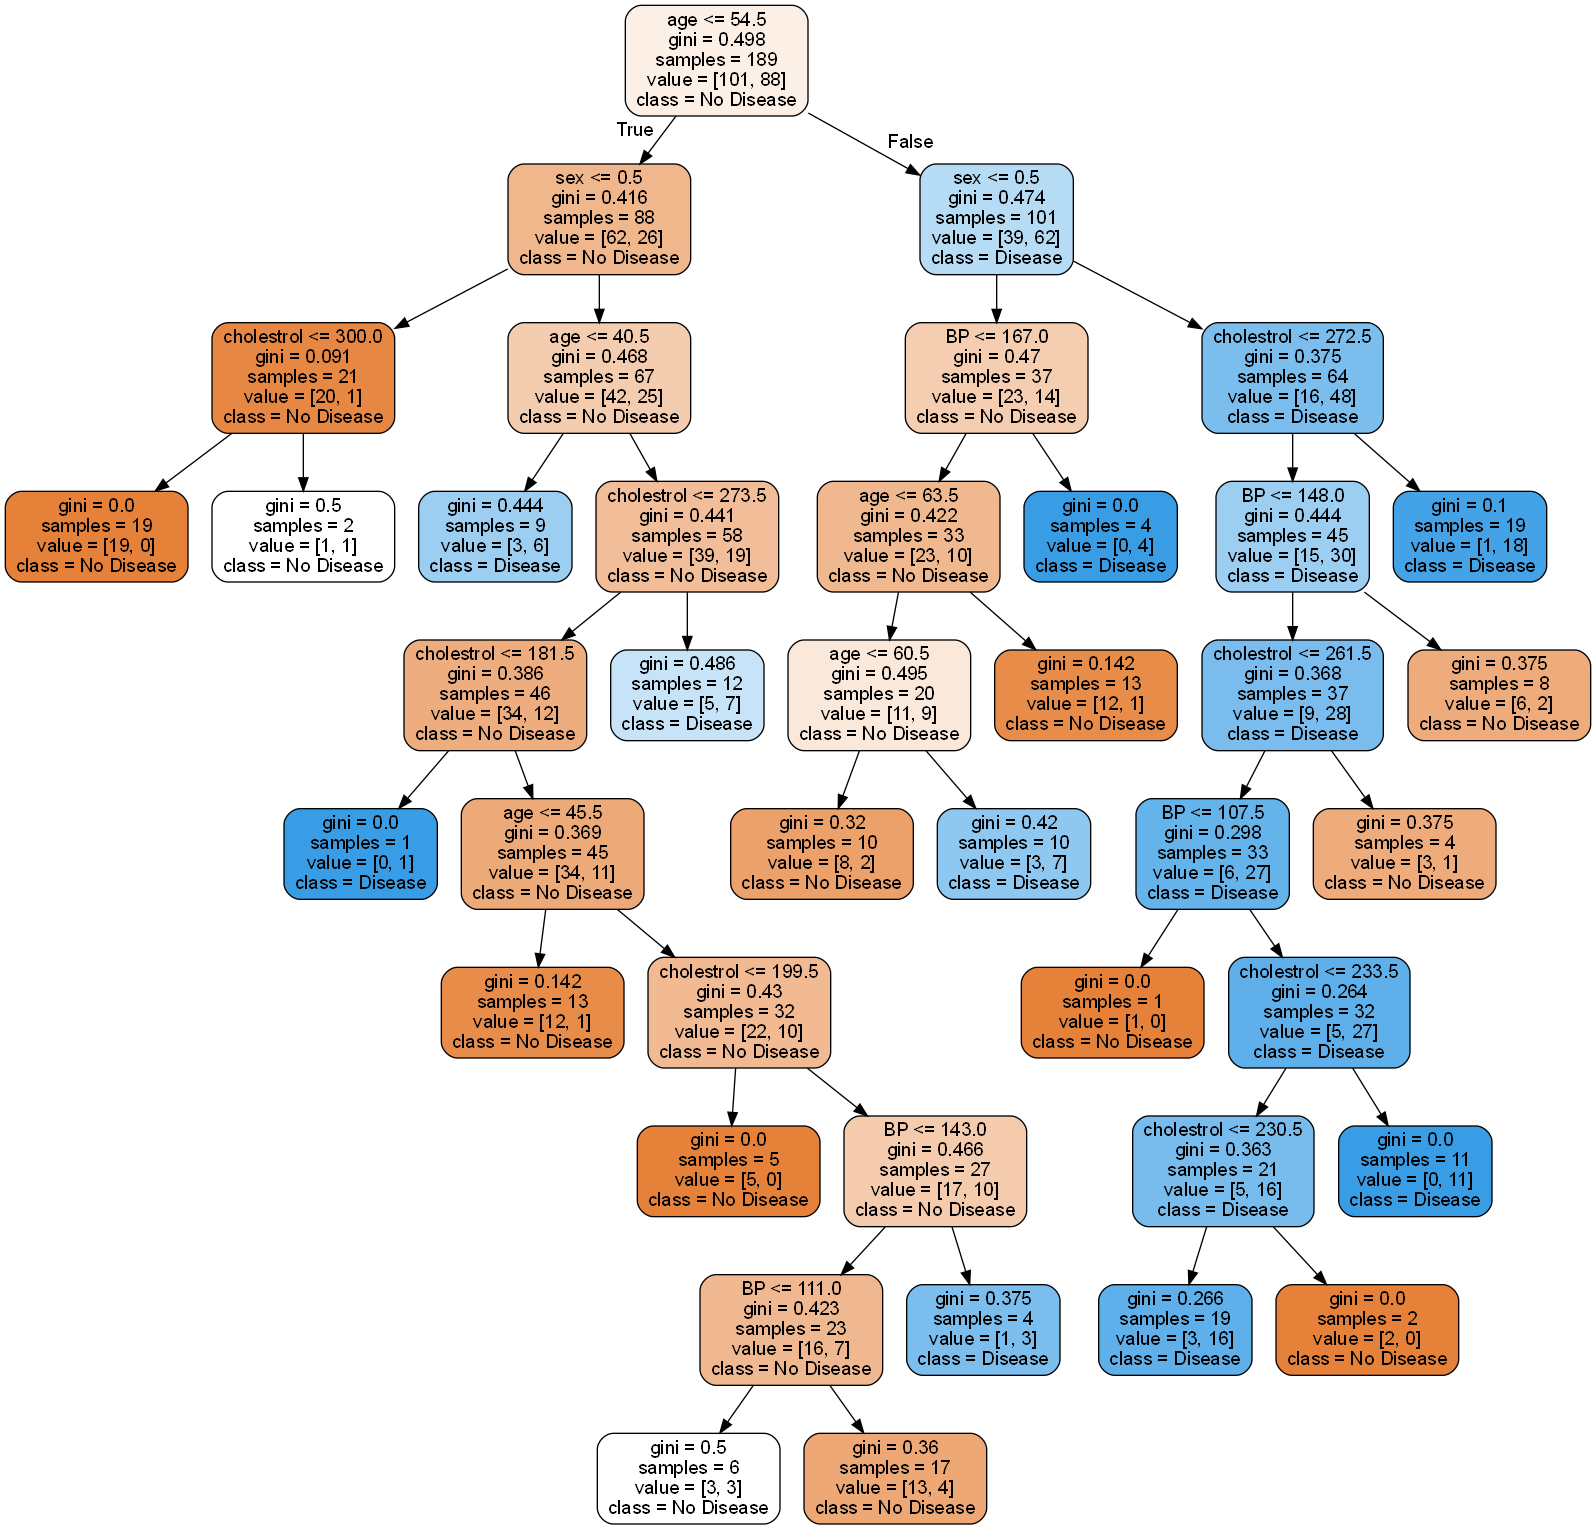

<Figure size 1152x720 with 0 Axes>

In [41]:
gph = get_dt_graph(dt_min_split)
Image(gph.create_png())

In [42]:
evaluate_model(dt_min_split)

Train Accuracy : 0.8359788359788359
Train Confusion Matrix:
[[85 16]
 [15 73]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[32 17]
 [12 20]]


We see that leaves have very less samples as well in few leaves. lets tweak that

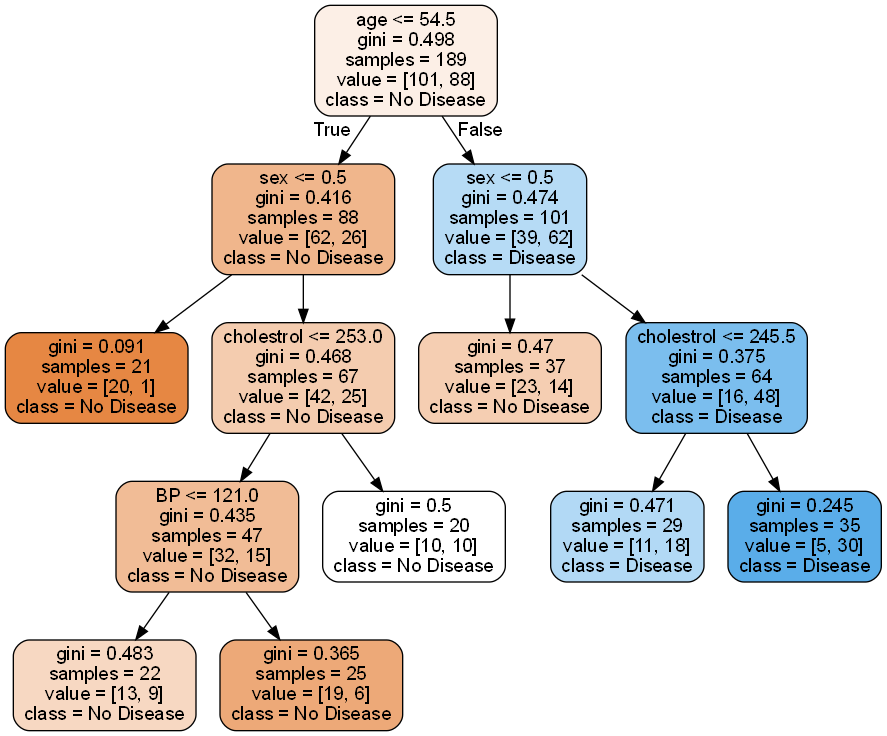

<Figure size 1152x720 with 0 Axes>

In [44]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20,random_state=42)
dt_min_leaf.fit(X_train,y_train)

gph = get_dt_graph(dt_min_leaf)
Image(gph.create_png())



In [45]:
evaluate_model(dt_min_leaf)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[38 11]
 [18 14]]


Lets use entropy instead of gini

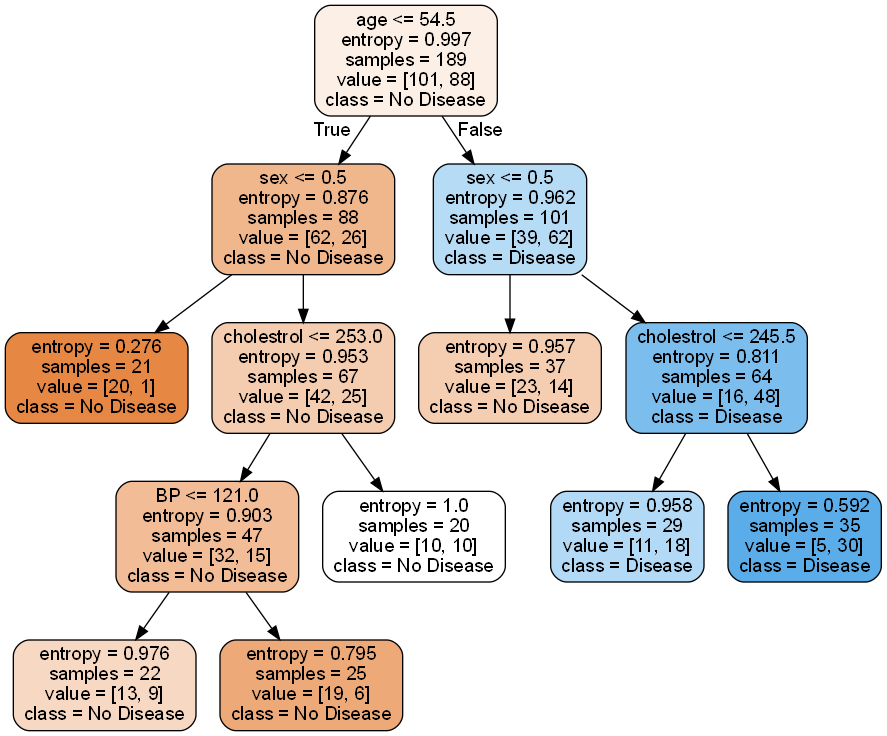

<Figure size 1152x720 with 0 Axes>

In [46]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20,random_state=42,criterion="entropy")
dt_min_leaf_entropy.fit(X_train,y_train)

gph = get_dt_graph(dt_min_leaf_entropy)
Image(gph.create_png())

In [47]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[38 11]
 [18 14]]


#### Hyperparameter tuning using GridSearcCV

In [48]:
dt = DecisionTreeClassifier(random_state=42)

In [49]:
from sklearn.model_selection import GridSearchCV

In [51]:
params = {
    "max_depth" : [2,3,5,10,20],
    "min_samples_leaf" : [5,10,20,50,100],
    "criterion": ['gini','entropy']
}

In [55]:
grid_search = GridSearchCV(estimator = dt,
                           cv = 4,
                           param_grid = params,
                           n_jobs = -1, ##multiple cores
                           verbose = 1,
                           scoring="accuracy"
            )
grid_search.fit(X_train,y_train)


Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [56]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}

In [58]:
cv = pd.DataFrame(grid_search.cv_results_)
cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015459,0.012488,0.003739,0.000826,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,17
1,0.008978,0.000997,0.005983,0.001866,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,17
2,0.007480,0.001655,0.003989,0.000705,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.687500,0.744681,0.617021,0.531915,0.645279,0.079551,20
3,0.005735,0.000827,0.003490,0.000864,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
4,0.005236,0.000827,0.002992,0.000706,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.541667,0.531915,0.531915,0.531915,0.534353,0.004223,41


In [60]:
cv.nlargest(5,'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
30,0.005486,0.000498,0.003241,0.000432,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.604167,0.765957,0.617021,0.680851,0.666999,0.064090,1
5,0.004487,0.000499,0.003740,0.000432,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.625000,0.744681,0.595745,0.659574,0.656250,0.055831,2
3,0.005735,0.000827,0.003490,0.000864,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
8,0.004238,0.000828,0.003242,0.000828,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
13,0.005486,0.000499,0.002492,0.000499,gini,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3


In [61]:
dt_best = grid_search.best_estimator_

In [62]:
evaluate_model(dt_best)

Train Accuracy : 0.7195767195767195
Train Confusion Matrix:
[[82 19]
 [34 54]]
--------------------------------------------------
Test Accuracy : 0.6172839506172839
Test Confusion Matrix:
[[36 13]
 [18 14]]


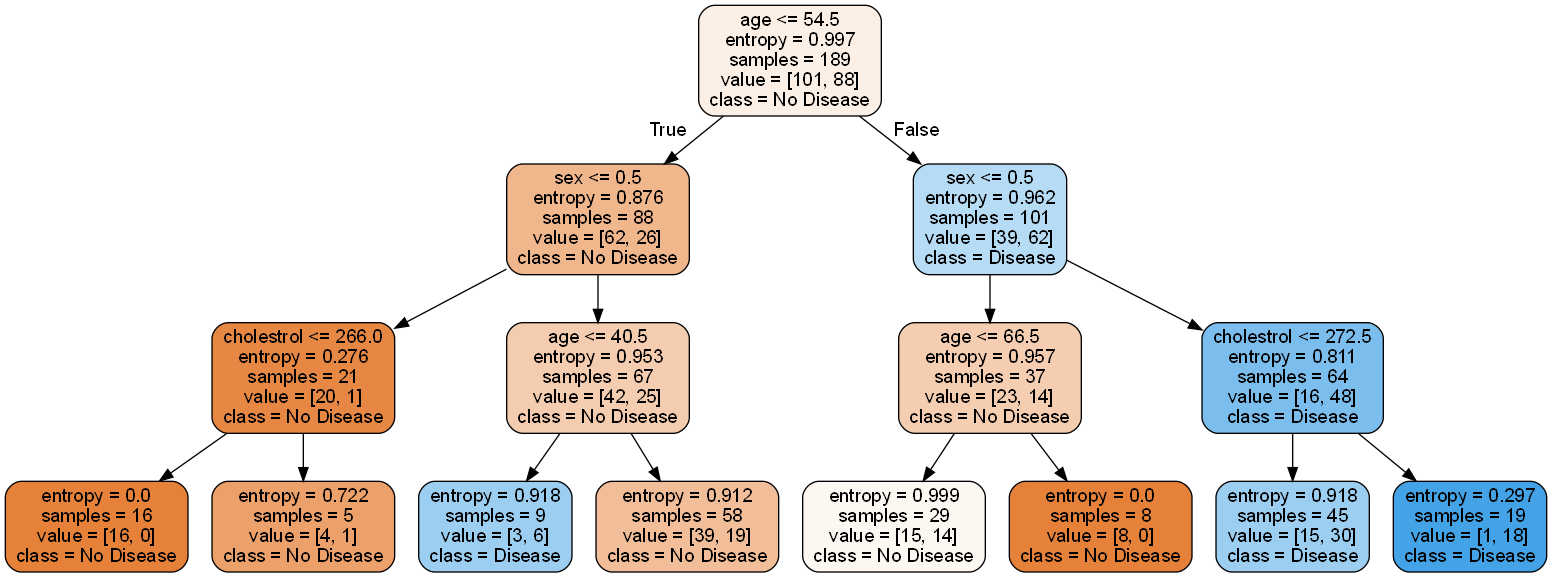

<Figure size 1152x720 with 0 Axes>

In [63]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())